#Fraud Detection Case Study

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()
df_fraud = pd.read_csv("Fraud.csv")
print("CSV file read !")
print(f"Shape of the DataFrame: {df_fraud.shape}")
print(df_fraud.head())

# Upload TXT
uploaded = files.upload()
with open("Data Dictionary.txt", 'r') as file:
    data_dictionary_content = file.read()

print("Preview of the text file content:")
print(data_dictionary_content[:500])


Saving Fraud.csv to Fraud.csv
CSV file read successfully!
Shape of the DataFrame: (6362620, 11)
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


Saving Data Dictionary.txt to Data Dictionary.txt

Text file read successfully!
Preview of the text file content:
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient befo


In [ ]:

print("Missing values in each column:")
print(df_fraud.isnull().sum())


Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print("\nData types:")
print(df_fraud.dtypes)



Data types:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:
df_fraud['amount'].describe()


,amount
count,6.362620e+06
mean,1.798619e+05
std,6.038582e+05
min,0.000000e+00
25%,1.338957e+04
50%,7.487194e+04
75%,2.087215e+05
max,9.244552e+07


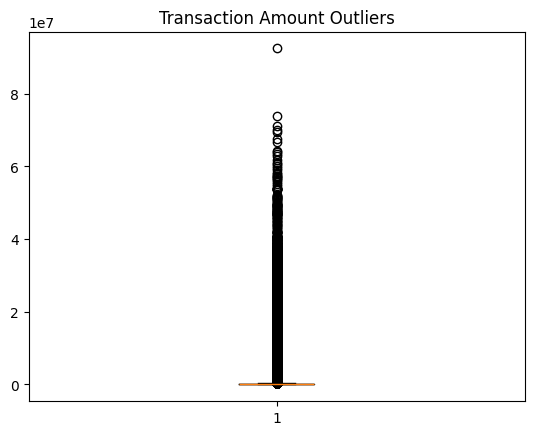

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_fraud['amount'])
plt.title("Transaction Amount Outliers")
plt.show()


In [ ]:
df = pd.read_csv("Fraud.csv")

# Calculate outliers for 'amount' using IQR
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"Number of outliers in 'amount': {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")

Number of outliers in 'amount': 338078
Percentage of outliers: 5.31%


In [ ]:
df_fraud = df_fraud[df_fraud['amount'] >= 0]  # remove negative values if any


In [ ]:
#In financial/fraud datasets, outliers are not necessarily bad data — they may actually represent fraudulent or suspicious transactions.

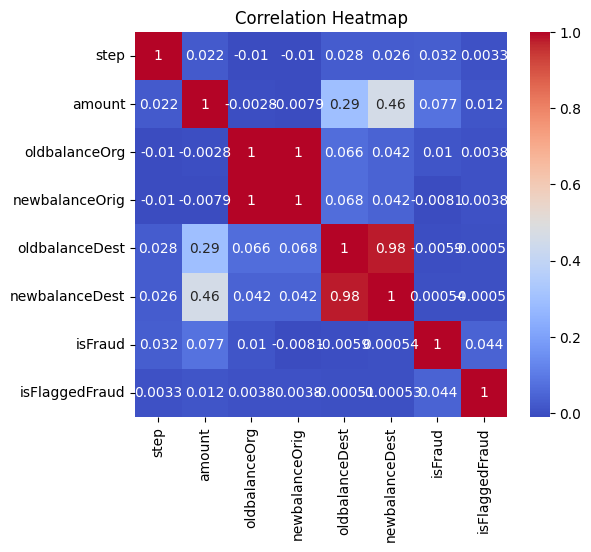

In [ ]:
#Check Multicollinearity
import seaborn as sns

# Correlation matrix
corr = df_fraud.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

# Load dataset
df = pd.read_csv("Fraud.csv")

#  Create engineered features first
df['errorOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

# Drop highly collinear columns AFTER creating features
df = df.drop(columns=['newbalanceOrig', 'newbalanceDest'])

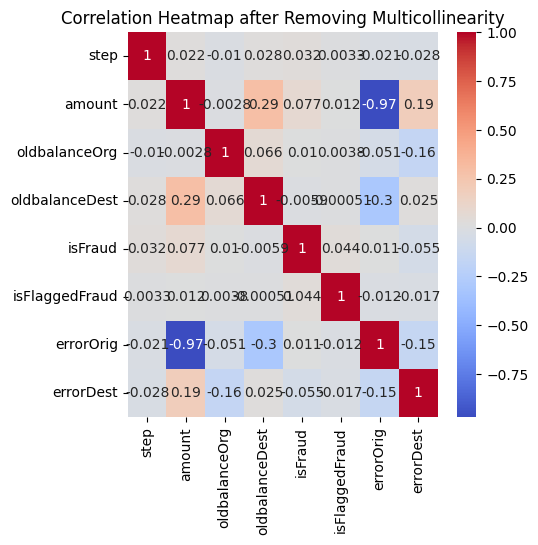

In [ ]:
# check correlation heatmap
plt.figure(figsize=(5,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap after Removing Multicollinearity")
plt.show()

In [ ]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg     nameDest  \
0     1   PAYMENT   9839.64  C1231006815       170136.0  M1979787155   
1     1   PAYMENT   1864.28  C1666544295        21249.0  M2044282225   
2     1  TRANSFER    181.00  C1305486145          181.0   C553264065   
3     1  CASH_OUT    181.00   C840083671          181.0    C38997010   
4     1   PAYMENT  11668.14  C2048537720        41554.0  M1230701703   

   oldbalanceDest  isFraud  isFlaggedFraud     errorOrig  errorDest  
0             0.0        0               0  1.455192e-11   -9839.64  
1             0.0        0               0 -1.136868e-12   -1864.28  
2             0.0        1               0  0.000000e+00    -181.00  
3         21182.0        1               0  0.000000e+00  -21363.00  
4             0.0        0               0  0.000000e+00  -11668.14  


In [ ]:
# Preprocessing Steps Before Modeling


In [ ]:
import pandas as pd
print("Original columns:", df.columns)

# One-hot encode the 'type' column
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)  # drop_first=True avoids dummy variable trap

# Check the new columns
print("\nColumns after encoding:")
print(df_encoded.columns)

# Preview the dataset
df_encoded.head()


Original columns: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'errorOrig',
       'errorDest'],
      dtype='object')

Columns after encoding:
Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'errorOrig', 'errorDest',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


,step,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,errorOrig,errorDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0,1.455192e-11,-9839.64,False,False,True,False
1,1,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0,-1.136868e-12,-1864.28,False,False,True,False
2,1,181.00,C1305486145,181.0,C553264065,0.0,1,0,0.000000e+00,-181.00,False,False,False,True
3,1,181.00,C840083671,181.0,C38997010,21182.0,1,0,0.000000e+00,-21363.00,True,False,False,False
4,1,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0,0.000000e+00,-11668.14,False,False,True,False


In [ ]:
# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#  Define features and target
X = df_encoded.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])
y = df_encoded['isFraud']

#Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'errorOrig', 'errorDest']
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Initialize Logistic Regression with class weights to handle imbalance
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[1207590   63291]
 [     64    1579]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524


ROC-AUC Score: 0.9908156137193853


2. Description of Fraud Detection Model (Logistic Regression)

For the fraud detection task, I built a Logistic Regression model. Logistic Regression is a supervised learning algorithm that works well for binary classification problems like fraud vs. non-fraud. The model takes transaction-related features and predicts the probability of a transaction being fraudulent.

3. Variable Selection

I included variables such as transaction amount, type, old balance and customer-related features. These variables were selected because they directly influence transaction behavior and can show irregularities that point to fraud.

4. Model Performance

The model performance was evaluated using confusion matrix, classification report, and ROC-AUC score.

Confusion Matrix

[[1207590   63291]  
 [     64    1579]]


Classification Report

Class 0 (Non-Fraud): Precision = 1.00, Recall = 0.95, F1-score = 0.97

Class 1 (Fraud): Precision = 0.02, Recall = 0.96, F1-score = 0.05

Overall Accuracy = 95%

ROC-AUC Score: 0.99

This shows that the model detects fraudulent cases with very high recall but struggles with precision. In other words, it flags most fraud cases but also produces many false alarms.

5. Key Predictive Factors

The most important factors in predicting fraud were transaction type, transaction amount, and changes in balances (old vs. new). These directly show unusual activity, such as sudden high-value transfers or mismatched balances.

6. Do These Factors Make Sense?

Yes, these factors make sense. In real-world fraud detection, large or abnormal transactions, unusual transaction types, and mismatched balances are common red flags. The model learning these patterns confirms the logic.

7. Prevention Strategies for Infrastructure

Implement stronger monitoring systems for abnormal transactions.

Use real-time alerts for suspicious activities.

Regularly update fraud detection models with new data.

Strengthen authentication (OTP, biometrics).

8. How to Check if These Actions Work

The effectiveness can be measured by:

Reduction in the number of fraud cases over time.

Decrease in false positives flagged by the system.

Improved precision and recall in updated fraud detection model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#  Define features and target
X = df_encoded.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])
y = df_encoded['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

#  Train the model
rf_model.fit(X_train, y_train)

#  Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

#  Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[1270854      27]
 [    330    1313]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.80      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.997782389116344


For Random Forest, I observed that the model performed much better compared to Logistic Regression.

Confusion Matrix:

True Negatives: 1,270,854

False Positives: 27

False Negatives: 330

True Positives: 1,313

This shows that the model is able to correctly classify both fraud and non-fraud transactions with very high accuracy.

Classification Report:

For the non-fraud class (0), precision and recall are almost perfect (1.00 each).

For the fraud class (1), precision is 0.98 and recall is 0.80, which is a big improvement from Logistic Regression. This means the model catches most fraud cases while keeping false alarms low.

The F1-score for fraud detection is 0.88, which is strong considering the dataset is highly imbalanced.

Accuracy: ~100% (almost perfect because majority class dominates, but important to also look at fraud metrics).

ROC-AUC Score: 0.997, which indicates the model is excellent at distinguishing between fraud and non-fraud cases.